In [9]:
!pip install xgboost

     -------------------------------------- 89.1/89.1 MB 393.8 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\sunny\Desktop\DS Material\Data Set\Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df['Customer_Segment'].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

In [5]:
# Data description
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

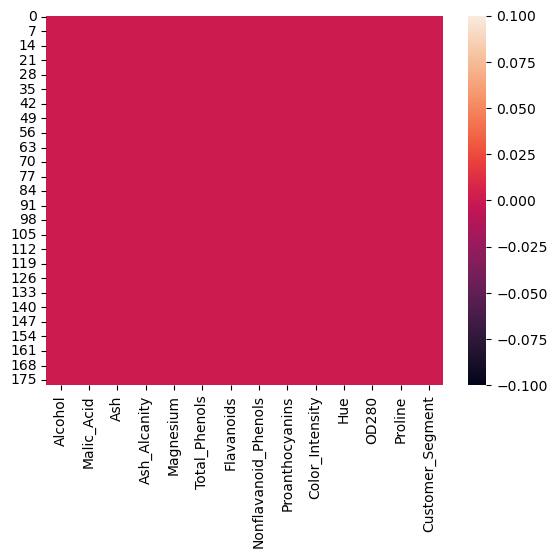

In [6]:
# Null values

sns.heatmap(df.isna())

In [7]:
# Correlation

<AxesSubplot:>

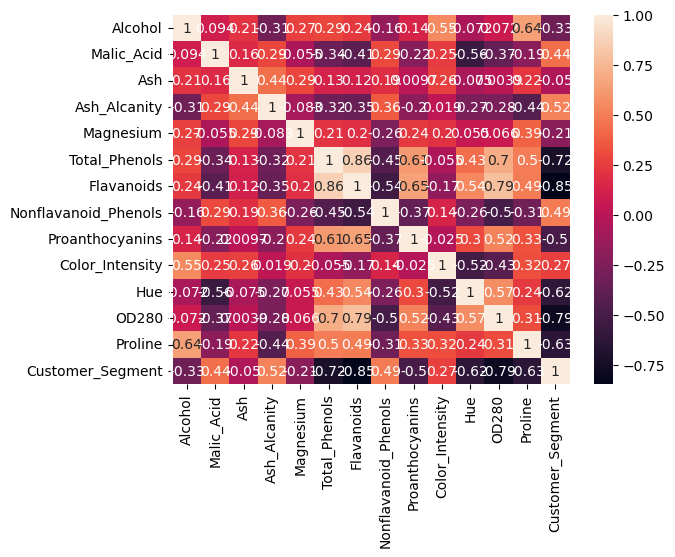

In [8]:
sns.heatmap(df.corr(), annot= True)

In [9]:
# Define x & y

x = df.iloc[:,:-1]
y = df['Customer_Segment']

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2, random_state=1)

In [11]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy:', lg.score(xtrain,ytrain))
print('Test Accuracy:', lg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

Train Accuracy: 0.971830985915493
Test Accuracy: 0.9444444444444444


# Bagging Classifier

In [12]:
# Homogenious
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators= 20)

In [13]:
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy:', bg.score(xtrain,ytrain))
print('Test Accuracy:', bg.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


In [14]:
# prediction function


In [15]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))
    print('Train Accuracy:', model.score(xtrain,ytrain))
    print('Test Accuracy:', model.score(xtest,ytest))

In [16]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.80      0.92      0.86        13
           3       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36

Train Accuracy: 1.0
Test Accuracy: 0.8888888888888888


In [17]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


In [18]:
predict(BaggingClassifier(DecisionTreeClassifier(max_depth= 3), n_estimators=150))

# This is also a Random forest

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Train Accuracy: 0.9929577464788732
Test Accuracy: 0.9444444444444444


In [19]:
predict(KNeighborsClassifier())

# Accuracy is very worst bcz our data is not feature scaled

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.56      0.69      0.62        13
           3       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.63      0.64      0.63        36

Train Accuracy: 0.823943661971831
Test Accuracy: 0.6388888888888888


In [20]:
predict(BaggingClassifier(KNeighborsClassifier()))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.53      0.62      0.57        13
           3       0.25      0.22      0.24         9

    accuracy                           0.61        36
   macro avg       0.57      0.56      0.57        36
weighted avg       0.61      0.61      0.61        36

Train Accuracy: 0.8380281690140845
Test Accuracy: 0.6111111111111112


#  Boosting Classifier

In [21]:
# homogenious lerner

predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.71      0.92      0.80        13
           3       1.00      0.56      0.71         9

    accuracy                           0.83        36
   macro avg       0.88      0.80      0.81        36
weighted avg       0.87      0.83      0.83        36

Train Accuracy: 0.9225352112676056
Test Accuracy: 0.8333333333333334


In [22]:
predict(GradientBoostingClassifier(learning_rate=1))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222


In [23]:
# K fold cv

In [32]:
kf = KFold(n_splits=10)

score = cross_val_score(GradientBoostingClassifier(), x,y, cv= kf)
score

array([0.94444444, 0.88888889, 0.94444444, 0.88888889, 0.83333333,
       1.        , 0.94444444, 0.83333333, 0.88235294, 1.        ])

kf = KFold(n_splits= 10)
score = cross_val_score(GradientBoostingClassifier(), x,y, cv= kf)
score

In [33]:
score.mean()

0.9160130718954248

<AxesSubplot:xlabel='Customer_Segment', ylabel='count'>

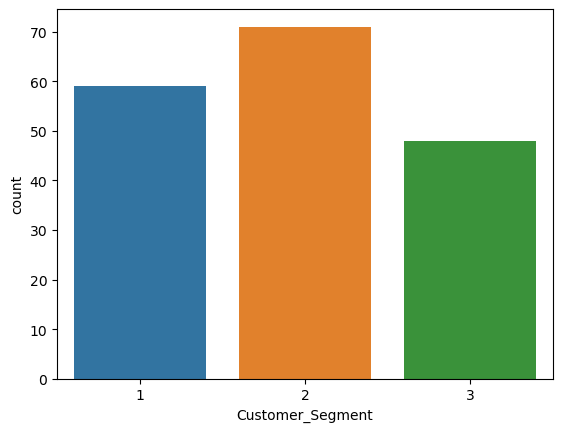

In [34]:
sns.countplot(df['Customer_Segment'])

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size= 0.2, random_state=1)

In [ ]:
predict(XGBClassifier(max_depth = 5))

# Voting & Stacking classifier


In [26]:
# Hetrogenious lerner

# model list

In [27]:
models = []

models.append(('lr', LogisticRegression()))
models.append(('dt', DecisionTreeClassifier()))
models.append(('dt1', DecisionTreeClassifier(criterion= 'entropy')))
models.append(('rf', RandomForestClassifier()))

In [28]:
models

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy')),
 ('rf', RandomForestClassifier())]

In [29]:
vt = VotingClassifier(estimators= models)
vt.fit(xtrain,ytrain)
ypred = vt.predict(xtest)
print(classification_report(ytest,ypred))
print('Train Accuracy:' , vt.score(xtrain,ytrain))
print('Test Accuracy:', vt.score(xtest,ytest))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


In [30]:
predict(VotingClassifier(estimators=models))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.86      0.92      0.89        13
           3       1.00      0.78      0.88         9

    accuracy                           0.92        36
   macro avg       0.93      0.90      0.91        36
weighted avg       0.92      0.92      0.92        36

Train Accuracy: 1.0
Test Accuracy: 0.9166666666666666


In [31]:
predict(StackingClassifier(estimators=models, final_estimator= RandomForestClassifier()))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

Train Accuracy: 1.0
Test Accuracy: 0.9722222222222222
